### Imports

#### Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

#%matplotlib notebook

from sklearn import datasets

import time

from sklearn.decomposition import PCA

from sklearn import manifold
from sklearn.manifold import MDS
from sklearn.manifold import LocallyLinearEmbedding as LLE
from sklearn.manifold import TSNE

#### Datasets

In [15]:
X, y = datasets.make_s_curve(n_samples = 1000, noise = 0.01)

### Visualizations

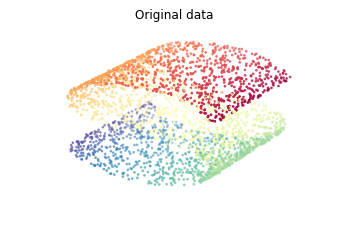

In [4]:
fig = plt.figure(figsize = (6,4))

ax = fig.add_subplot(111, projection = '3d' )
ax.scatter(X[:, 0], X[:, 1], X[:, 2], s = 3, c=y, cmap=plt.cm.Spectral)
ax.set_title("Original data")
plt.axis('off')
plt.show()

#### Principal Component Analysis

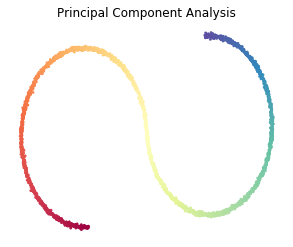

Time elapsed: 0.17253947257995605


In [6]:
# PCA on X (training set) 

start = time.time()

pca = PCA(n_components = 3)
X_centered = X - X.mean(axis = 0)
pca.fit(X_centered)
X_pca = pca.transform(X)

plt.figure(figsize = (5,4))

scatter = plt.scatter(x = X_pca[:,0], y = X_pca[:,1],s = 3, c = y, cmap = plt.cm.Spectral, alpha = 1)
#legend = plt.legend(*scatter.legend_elements())
plt.axis('off')
plt.title('Principal Component Analysis')
plt.show()

print('Time elapsed: ' + str(time.time()-start))

#### Locally Linear Embedding

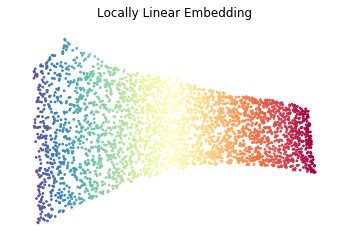

In [10]:
X_lle, err = manifold.locally_linear_embedding(X, n_neighbors=12,
                                             n_components=2)

plt.figure(figsize = (6,4))
plt.scatter(X_lle[:, 0], X_lle[:, 1], s = 3, c=y, cmap=plt.cm.Spectral)
plt.title('Locally Linear Embedding')
plt.axis('off')
plt.show()

#### Multi-Dimensional Scaling

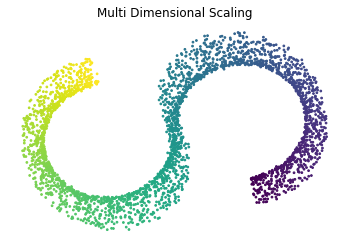

Time elapsed: 286.7126233577728


In [12]:
start = time.time()
from sklearn.manifold import MDS
mds = MDS(n_components = 2)
X_centered = X - X.mean(axis = 0)
X_mds = mds.fit_transform(X)
plt.figure(figsize = (6,4))

scatter = plt.scatter(x = X_mds[:,0], y = X_mds[:,1],s = 3, c = y, alpha = 1)
#legend = plt.legend(*scatter.legend_elements())
plt.title('Multi Dimensional Scaling')
plt.axis('off')
plt.show()

print('Time elapsed: ' + str(time.time()-start))

#### t-SNE

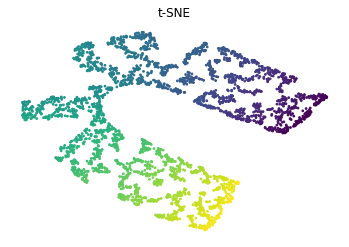

Time elapsed: 16.518181085586548


In [11]:
start = time.time()

tsne = TSNE(n_components = 2)
X_centered = X - X.mean(axis = 0)
X_tsne = tsne.fit_transform(X)
plt.figure(figsize = (6,4))

scatter = plt.scatter(x = X_tsne[:,0], y = X_tsne[:,1],s = 3, c = y, alpha = 1)
#legend = plt.legend(*scatter.legend_elements())
plt.title('t-SNE')
plt.axis('off')
plt.show()

print('Time elapsed: ' + str(time.time()-start))

### Quality of Fit Metrics

No universal metric for comparing the qualities of various dimensionality reduction methods exist.

This is because it is hard to quantify information loss that occurs in dimensionality reduction by one single metric

Information loss may mean proportion of unexplained variance, or KL divergence or magnitude of mean squared error in different contexts

Different methods optimize different error functions, so using a single metric to quantify information loss is misleading

It's like saying giraffes are the best animals because they are the tallest. Reality is more nuanced than that. 



#### 1. Explained Variance for PCA

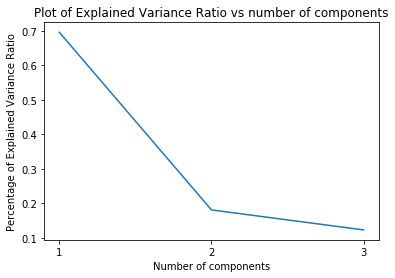

In [26]:
dimension_limit = 4
exp_var = []

for n in range(1, dimension_limit):
    pca = PCA(n_components = n)
    X_centered = X - X.mean(axis = 0)
    pca.fit_transform(X_centered)
    exp_var.append(min(pca.explained_variance_ratio_))

x = [i for i in range(1,dimension_limit)]
plt.plot(x,exp_var)

plt.xlabel('Number of components')
plt.ylabel('Percentage of Explained Variance Ratio')
plt.title('Plot of Explained Variance Ratio vs number of components')
plt.xticks([1,2,3])

plt.show()

#### 2. Reconstruction Error for LLE

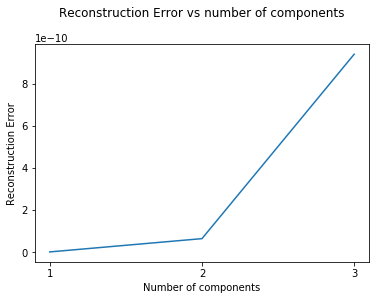

In [22]:
dimension_limit = 4
rec_er = []

for n in range(1, dimension_limit):
    lle = LLE(n_components = n)
    X_centered = X - X.mean(axis = 0)
    lle.fit_transform(X_centered)
    rec_er.append(lle.reconstruction_error_)

x = [i for i in range(1,dimension_limit)]
plt.plot(x,rec_er)

plt.xlabel('Number of components')
plt.ylabel('Reconstruction Error')
plt.title('Reconstruction Error vs number of components', y = 1.1)
plt.xticks([1,2,3])
plt.show()

#### 3. Stress for MDS

It is the error sum of squares between all map-points. 

The lower, the better. 

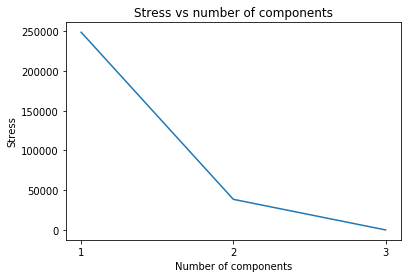

In [25]:
dimension_limit = 4
stress = []

for n in range(1, dimension_limit):
    mds = MDS(n_components = n)
    X_centered = X - X.mean(axis = 0)
    mds.fit_transform(X_centered)
    stress.append(mds.stress_)

x = [i for i in range(1,dimension_limit)]
plt.plot(x,stress)

plt.xlabel('Number of components')
plt.ylabel('Stress')
plt.title('Stress vs number of components')
plt.xticks([1,2,3])
plt.show()

#### 4. KL Divergence for t-SNE

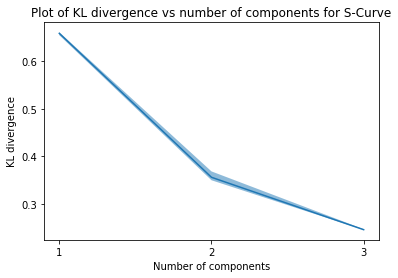

In [17]:
n_comp_kld = {}
dimension_limit = 4
max_kld = []
min_kld = []
mean_kld = []

for n_comps in range(1,dimension_limit):
    kld = []
    for i in range(3):
        tsne = TSNE(n_components = n_comps, perplexity = 50, method = 'exact')
        tsne.fit_transform(X)
        kld.append(tsne.kl_divergence_)
    n_comp_kld[n_comps] = kld
    max_kld.append(max(kld))
    min_kld.append(min(kld))
    mean_kld.append(sum(kld)/3.0)
    
x = [i for i in range(1,dimension_limit)]
plt.fill_between(x,min_kld, max_kld, alpha = 0.5)
plt.plot(x,mean_kld)
plt.xlabel('Number of components')
plt.ylabel('KL divergence')
plt.title('Plot of KL divergence vs number of components for S-Curve')
plt.xticks([1,2,3])
plt.show()